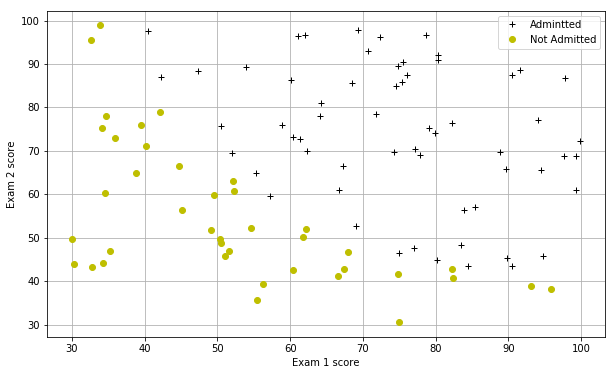

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

datafile = 'ex2data1.txt'
cols = np.loadtxt(datafile, delimiter=',', usecols=(0,1,2), unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))

m = y.size
X = np.insert(X, 0, 1, axis = 1)
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

def plot():
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,1], pos[:,2], "k+", label='Admintted')
    plt.plot(neg[:,1], neg[:,2], "yo", label="Not Admitted")
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid(True)      

plot()

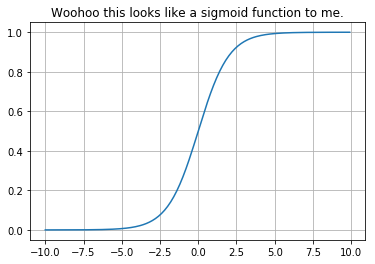

In [8]:
from scipy.special import expit #Vectorized sigmoid function
myx = np.arange(-10, 10, .1)
myx = np.arange(-10,10,.1)
plt.plot(myx,expit(myx))
plt.title("Woohoo this looks like a sigmoid function to me.")
plt.grid(True)



In [24]:
def h(theta, X):
    return expit(np.dot(X,theta))

def computeCost(mytheta,myX,myy,mylambda = 0.):
    term1 = np.dot(-np.array(myy).T, np.log(h(mytheta, myX)))
    term2 = np.dot((1-np.array(myy)).T, np.log(1-h(mytheta, myX))) 
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T, mytheta[1:]))
    return float((1./m) *( np.sum(term1-term2) + regterm))

initial_theta = np.zeros((X.shape[1],1))
print(initial_theta)
computCost(initial_theta,X,y)
from scipy import optimize

def optimizeTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.fmin(computeCost, x0=mytheta, args=(myX, myy, mylambda), maxiter=400, full_output=True)
    return result[0], result[1]
theta, mincost = optimizeTheta(initial_theta,X,y)

[[0.]
 [0.]
 [0.]]
Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


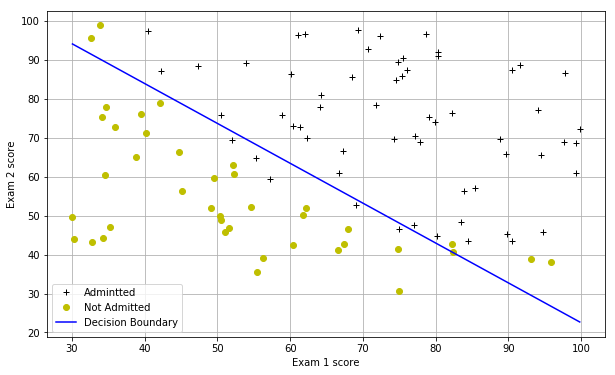

In [28]:
#Decision boundary occurs when h = 0, or when
#theta0 + theta1*x1 + theta2*x2 = 0
#y=mx+b is replaced by x2 = (-1/thetheta2)(theta0 + theta1*x1)

boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_ys = (-1./theta[2])*(theta[0] + theta[1]*boundary_xs)
plot()
plt.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
plt.legend()

def makePrediction(mytheta, myx):
    return h(mytheta,myx) >= 0.5

#Compute the percentage of samples I got correct:
pos_correct = float(np.sum(makePrediction(theta,pos)))
neg_correct = float(np.sum(np.invert(makePrediction(theta,neg))))
tot = len(pos)+len(neg) 
prcnt_correct = float(pos_correct+neg_correct)/tot
print "Fraction of training samples correctly predicted: %f." % prcnt_correct 


ValueError: shapes (118,28) and (3,) not aligned: 28 (dim 1) != 3 (dim 0)

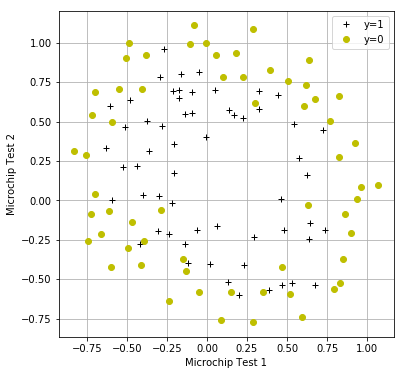

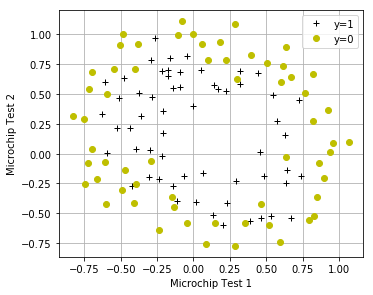

In [43]:
datafile = 'ex2data2.txt'
#!head $datafile
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data
##Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
##Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])
def plotData():
    plt.plot(pos[:,1],pos[:,2],'k+',label='y=1')
    plt.plot(neg[:,1],neg[:,2],'yo',label='y=0')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()
    plt.grid(True)

#Draw it square to emphasize circular features
plt.figure(figsize=(6,6))
plotData()
def computeCost(mytheta,myX,myy,mylambda = 0.): 
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    Note this includes regularization, if you set mylambda to nonzero
    For the first part of the homework, the default 0. is used for mylambda
    """
    #note to self: *.shape is (rows, columns)
    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

mappedX = mapFeature(X[:,1],X[:,2])


def optimizeRegularizedTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.minimize(computeCost, mytheta, args=(myX, myy, mylambda),  method='BFGS', options={"maxiter":500, "disp":False} )
    return np.array([result.x]), result.fun 
# theta, mincost = optimizeRegularizedTheta(initial_theta,mappedX,y)


initial_theta = np.zeros((mappedX.shape[1],1))
computeCost(initial_theta,mappedX,y)

def plotBoundary(mytheta, myX, myy, mylambda=0.): 
    theta, mincost = optimizeRegularizedTheta(mytheta,myX,myy,mylambda)
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in xrange(len(xvals)):
        for j in xrange(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")
    
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData()
plotBoundary(theta,mappedX,y,0.)

plt.subplot(222)
plotData()
plotBoundary(theta,mappedX,y,1.)

plt.subplot(223)
plotData()
plotBoundary(theta,mappedX,y,10.)

plt.subplot(224)
plotData()
plotBoundary(theta,mappedX,y,100.)